# Imports

In [1]:
# %matplotlib notebook
%matplotlib inline

import litstudy.plot
import litstudy.common
import litstudy.search
import litstudy.nlp

from importlib import reload

# import logging
# logging.getLogger().setLevel(logging.INFO)

# One-time scopus configuration file setup
# pybliometrics.scopus.utils.create_config()

# Parameters

In [2]:
query = 'title-abs-key("predictive maintenance" AND "deep learning")'

# Plot statistics

100%|██████████| 44/44 [00:00<00:00, 413.58it/s]


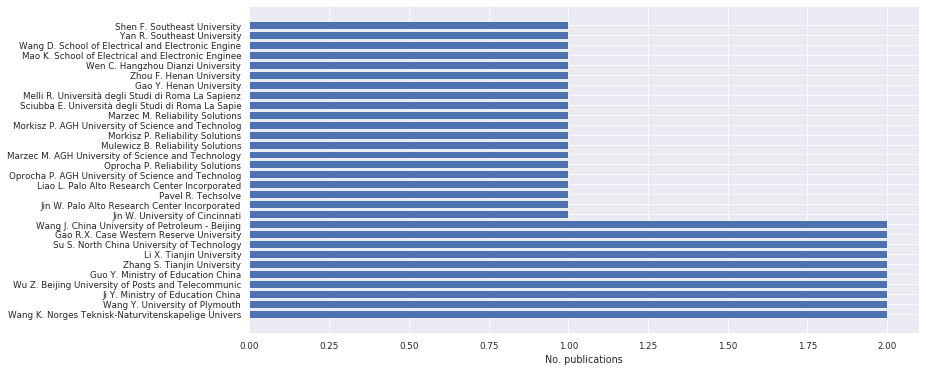

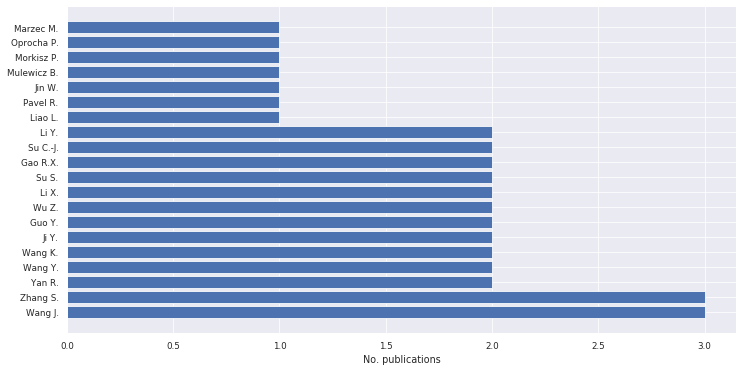

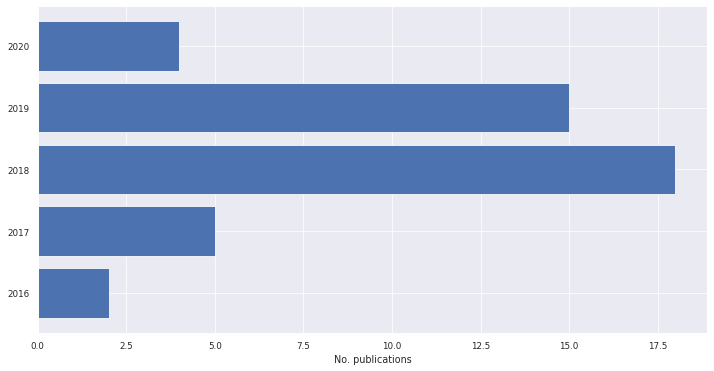

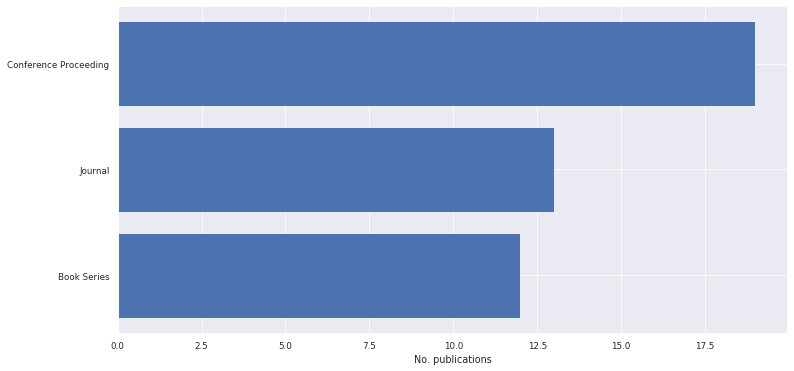

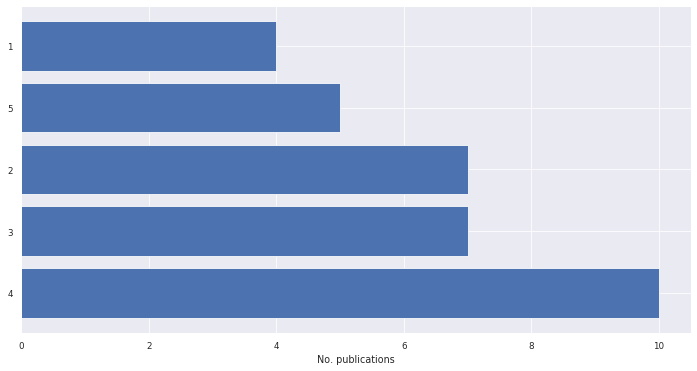

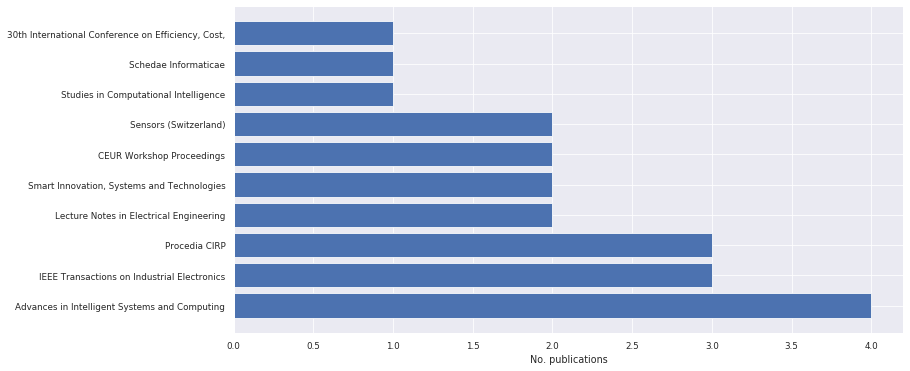

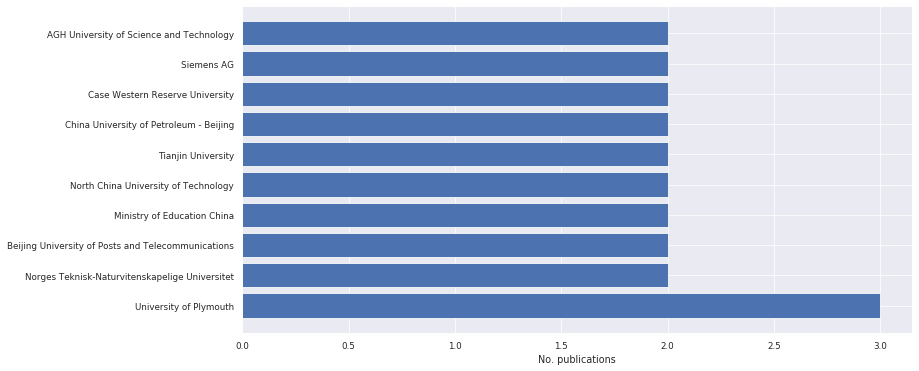

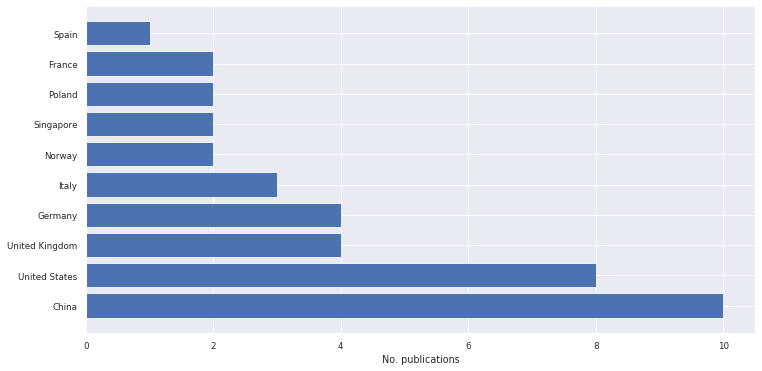

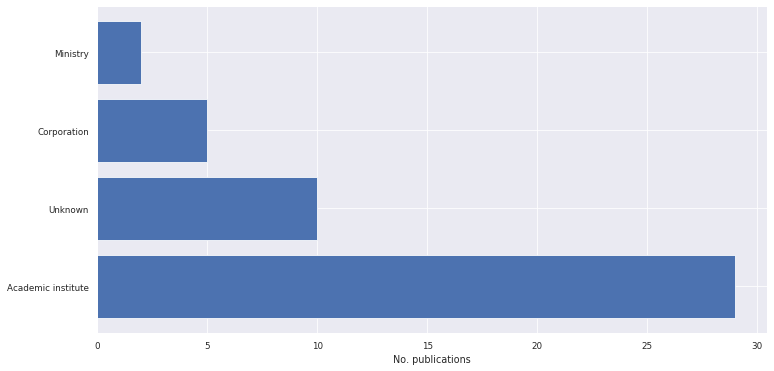

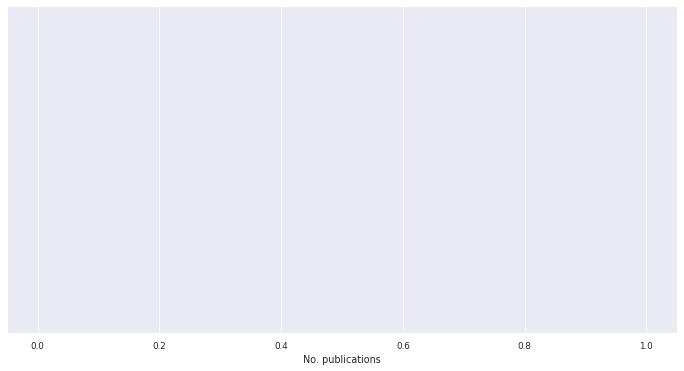

In [16]:
reload(litstudy.plot)
reload(litstudy.common)
reload(litstudy.search)
reload(litstudy.nlp)

docset = litstudy.search.search_scopus(query)
# docset = litstudy.search.search_mockup()

litstudy.plot.plot_author_affiliation_histogram(docset)
litstudy.plot.plot_author_histogram(docset)
litstudy.plot.plot_year_histogram(docset)
litstudy.plot.plot_source_type_histogram(docset)
litstudy.plot.plot_number_authors_histogram(docset)
litstudy.plot.plot_source_histogram(docset)
litstudy.plot.plot_affiliation_histogram(docset)
litstudy.plot.plot_country_histogram(docset)
litstudy.plot.plot_affiliation_type_histogram(docset)
litstudy.plot.plot_language_histogram(docset)

# Train topic models

In [17]:
dic, freqs = litstudy.nlp.build_corpus_simple(docset)

nmf_model = litstudy.nlp.train_nmf_model(dic, freqs, num_topics=4, passes=500)
lda_model = litstudy.nlp.train_lda_model(dic, freqs, num_topics=9)

# Plot frequent words, topic clouds and distribution

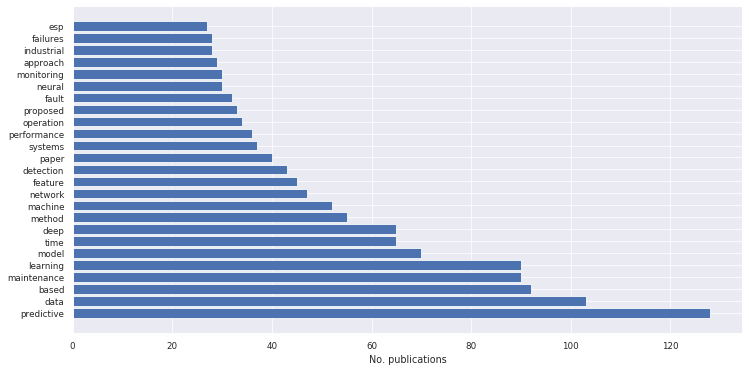

[t-SNE] Computing 43 nearest neighbors...
[t-SNE] Indexed 44 samples in 0.000s...
[t-SNE] Computed neighbors for 44 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 44 / 44
[t-SNE] Mean sigma: 0.427788
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.712612
[t-SNE] KL divergence after 1000 iterations: 0.364855
Corpus LSI: <gensim.interfaces.TransformedCorpus object at 0x7f8322b0bcc0> [(0, 0.32223295681695113), (1, -0.029150322959714467), (2, 0.06193507597625247), (3, -0.29397366623743626), (4, 0.027862390907154325), (5, -0.10136996056451704), (6, 0.18081782262139293), (7, -0.20817778841516538), (8, 0.3112370708343527), (9, 0.21467709200898277)]
[t-SNE] Computing 43 nearest neighbors...
[t-SNE] Indexed 44 samples in 0.000s...
[t-SNE] Computed neighbors for 44 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 44 / 44
[t-SNE] Mean sigma: 0.460241
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.

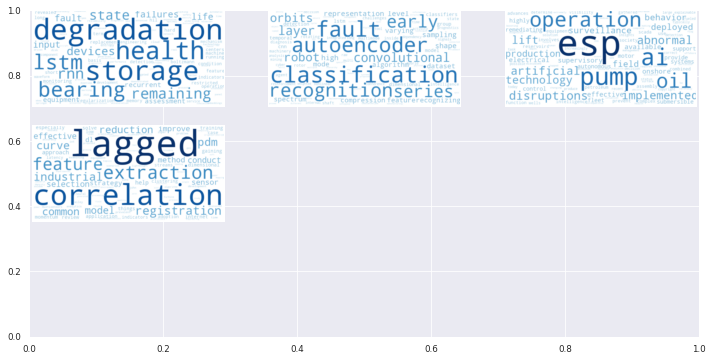

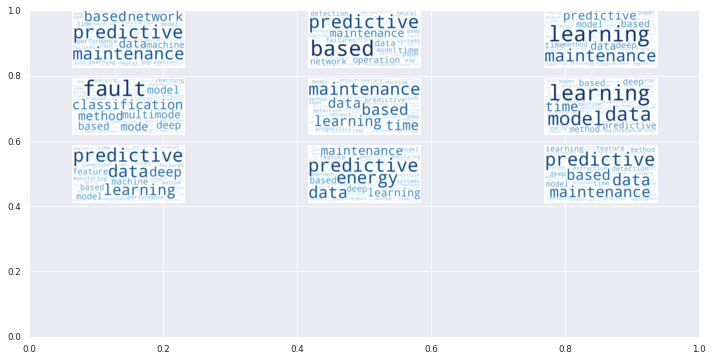

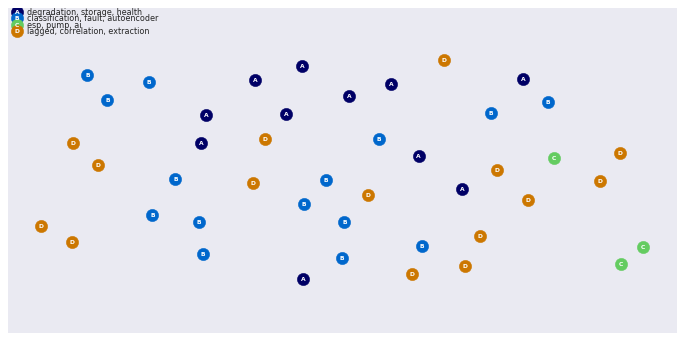

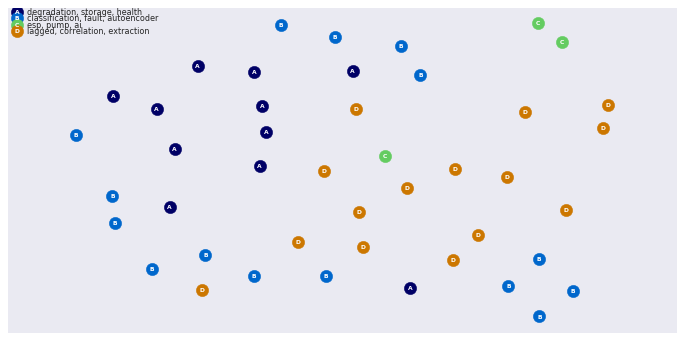

In [19]:
litstudy.plot.plot_words_histogram(freqs, dic)

litstudy.nlp.plot_topic_clouds(nmf_model)
litstudy.nlp.plot_topic_clouds(lda_model)

litstudy.nlp.plot_topic_distribution(nmf_model, dic, freqs)
litstudy.nlp.plot_topic_distribution_gensim(nmf_model, dic, freqs)